## W poniższym okienku proszę wpisać swoje **imię, nazwisko i numer grupy**.

*   Imię: Wojciech
*   Nazwisko: Siemiątkowski
*   Grupa: 12c



---

---






#**Ćwiczenia 1**

### Czego się nauczymy?

1. Podstawowych poleceń i składni pythona
2. Korzystania google colabolatory
3. Przybliżania funkcji wielomianem



In [1]:
# Podstawową biblioteką do obliczeń numerycznych w pythonie jest numpy:
import numpy as np

# Rysować wykresy będziemy najcześciej korzystając z biblioteki matplotlib:
import matplotlib.pyplot as plt

### **Podstawy python'a**




In [ ]:
# Wypisywanie wyników
print("Hello World")

Hello World


In [ ]:
# Pętla for
for i in range(1,10,2):
  print("i ma teraz wartość:", i)

i ma teraz wartość: 1
i ma teraz wartość: 3
i ma teraz wartość: 5
i ma teraz wartość: 7
i ma teraz wartość: 9


In [ ]:
# Funkcja (liniowa f(x) = ax+b)
def f(x, a,b):
    y = a*x+b
    return y

print("f(x = 1, a = 3, b = -1) = ", f(1, 3, -1))

# Funkcja (kwadratowa g(x) = ax^2 + bx + c)
def g(x, a=1, b=0 ,c=0):
    y = a*x**2 + b*x + c 
    return y

print("g(x = 1) = ", g(1))

f(x = 1, a = 3, b = -1) =  2
g(x = 1) =  1


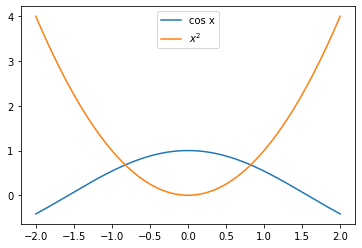

In [ ]:
# Rysowanie wykresów

# Definiowanie tabeli 200 liczb od 1 do 10
x = np.linspace(-2,2,200)

# Przypisanie każdej z liczb wartości funkcji
y = np.cos(x)

# Rysowanie
plt.plot(x,y, label = 'cos x')
plt.plot(x,g(x), label = '$x^2$')
plt.legend()

### **Zadanie 1**

Napisz funkcję liczącą wartość $n!$ dla dowolnej liczby naturalnej, gdzie $n! = 1\cdot2\cdot3\cdot4\cdot \dots n$.

In [2]:
def silnia(n):
  y = 1
  for i in range(1, n + 1):
    y = y * i

  return y

n = 5
y = silnia(n)
print(f"Wartość silni dla {n} wynosi {y}")


Wartość silni dla 5 wynosi 120


### **Zadanie 2**

Policz pochodną funkcji $f(x) = x^2$ korzystając z poniższej definicji:

$f'(x) = \lim_{h \to 0} \frac{f(x+h)-f(x)}{h}$

In [ ]:
# Definiujemy tablicę n wartości x z przedziału od a do b
a = 0
b = 10
n = 1000

x = np.linspace(a,b,n)

In [ ]:
# Liczymy wartość naszej funkcji dla wszystkich wartości x
y = x**2

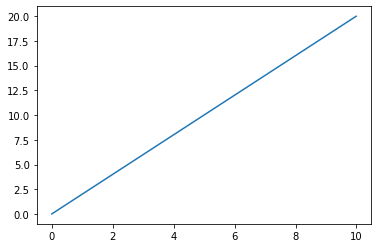

In [ ]:
# W tym okienku policz pochodną f(x):

result = (y[0:-1] - y[1:])/(x[0:-1] - x[1:])
# print(f"Pochodna wynosi {result}")
plt.plot(x[0:-1], result)

### **Zadanie 3**

a) Napisz funkcję liczącą sumę $k$ pierwszych wyrazów poniższego szeregu:

> $\mathrm{e}^x = \sum^\infty_{n=0} \frac{x^n}{n!}$


b) Narysuj wykres pokazujący jak błąd przybliżenia zmienia się z k dla różnych wartości $x$.



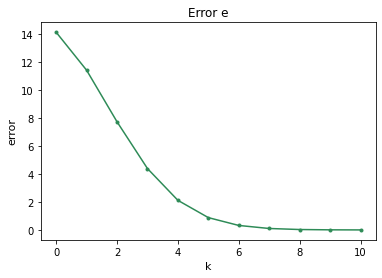

In [6]:
def sumaCzesciowa(x, k):
  y = 0

  for i in range(0, k + 1):
    y += (x**i)/silnia(i)

  return y

def eError(x, k):
  return np.exp(x) - sumaCzesciowa(x, k)


xList = []
testValue = np.exp(1)
errorList = []
k = 10

for i in range (0, k + 1):
  xList.append(i)
  errorList.append(eError(testValue, i))

fig = plt.figure()
plt.plot(xList, errorList, marker = '.', linestyle = '-', color = 'seagreen')
plt.xlabel('k', fontsize=11)
plt.ylabel('error', fontsize=11)
plt.title('Error e')
plt.show()



### **Zadanie 4**

a) Rozwiń $sin(x)$ w szereg i napisz funkcję liczącą sumę $k$ pierwszych wyrazów tego szeregu.

$\sin x = \sum^\infty_{n=0} \frac{(-1)^n}{(2n+1)!} x^{2n+1}\quad$

b) Narysuj wykres pokazujący jak błąd przybliżenia zmienia się z $k$ dla różnych wartości $x$.

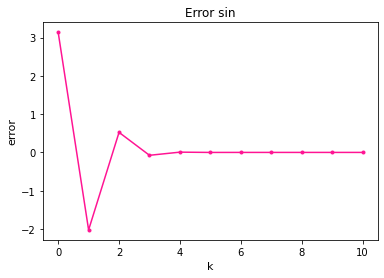

In [4]:
# aᵏ = fᵏ(0)/k!
# f(0) = sin(0) = 0
# f'(0) = cos(0) = 1
# f''(0) = -sin(0) = 0
# f'''(0) = -cos(0) = -1
# f⁴(0) = sin(0) = 0
# f⁵(0) = cos(0) = 1
# sin(x) = 0 + (x/1!) + 0 + (-x³/3!) + 0 + (x⁵/5!) + ... =
# = x - (x³/3!) + (x⁵/5!) + ...

def sumaSinus(x, k):
    y = 0

    for i in range(0, k + 1):
      y += (((-1)**i)/silnia(2*i + 1))*(x**(2*i + 1))
    
    return y


def sinError(x, k):
  return np.sin(x) - sumaSinus(x, k)


xList = []
testValue = np.pi
errorList = []
k = 10

for i in range (0, k + 1):
  xList.append(i)
  errorList.append(sinError(testValue, i))

fig = plt.figure()
plt.plot(xList, errorList, marker = '.', linestyle = '-', color = 'deeppink')
plt.xlabel('k', fontsize=11)
plt.ylabel('error', fontsize=11)
plt.title('Error sin')
plt.show()


### **Zadanie 5**

Wyprowadź wzór na rozwinięcie w szereg funkcji $cos(x)$:

$\cos x = \sum^\infty_{n=0} \frac{(-1)^n}{(2n)!} x^{2n}\quad$

i narysuj jak wartość sumy $cos^2(x) + sin^2(x)$ zmienia się z liczbą sumowanych składników.

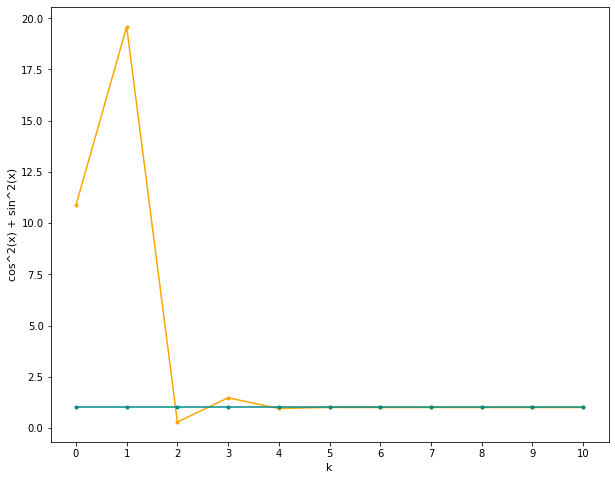

In [ ]:
# cos(x) = d/dx sin(x) = d/dx(x - (x³/3!) + (x⁵/5!) + ...) =
# = 1 - (x²/2!) + (x⁴/4!) - ... 

def sumaCosinus(x, k):
    y = 0

    for i in range(0, k + 1):
      y += (((-1)**i)/silnia(2*i))*(x**(2*i))
    
    return y

def jedynka(x, k):
  return(sumaCosinus(x, k)**2) + (sumaSinus(x, k)**2)


xList = []
sumList = []
testSumList = []
testValue = np.pi
k = 10

for i in range (0, k + 1):
  xList.append(i)
  sumList.append(jedynka(testValue, i))
  testSumList.append((np.cos(testValue)**2) + (np.sin(testValue)**2))

fig = plt.figure()
fig.set_figwidth(10)
fig.set_figheight(8)

plt.plot(xList, sumList, marker = '.', linestyle = '-', color = 'orange')
plt.plot(xList, testSumList, marker = '.', linestyle = '-', color = 'darkcyan')
plt.xticks(xList, xList)
plt.xlabel('k', fontsize=11)
plt.ylabel('cos^2(x) + sin^2(x)', fontsize=11)
plt.show()


### **Zadanie 6**

a) Rozwiń w szereg Maclaurina funkcję $\log(1+x)$.

$\log(1+x) = \sum^\infty_{n=0} \frac{(-1)^{n+1}}{n} x^{n}\quad$

b) Podaj przedział zbieżności szeregu.

c) Napisz dlaczego nie można rozwijać w szereg Maclaurina funkcji $\log(x)$

In [ ]:
# a
#f(x) = f(0) + x * f’(0) + (x²/2!)* f’’(0) + …. 
#f(x) = log(1+x) => f(0) = log(1+0) = log(1)=0
#f'(x) = 1/(1+x) => f'(0) = 1/(1+0) = 1
#f''(x) = -1/(1+x)² => f''(0) = -1/(1+0)² = -1
#f'''(x) = 2/(1+x)³ => f'''(0) = 2/(1+0)³ = 2
#log(1+x)= 0 + (x/1!)*(1) + (x²/2!)*(-1) + (x³/3!)*(2) + … = x - x²/2 + x³/3 + …

# b
# |x| < 1 => -1 < x < 1

# c
# Nie istnieje taki x dla którego aˣ = 0 stąd logₐ(0) jest niezdefiniowany, a
# szereg Maclaurina to szereg Taylora dla x₀ = 0 stąd nie może zostać rozpisany
# dla log(x).